## Задача:
Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи
из области физики, экономики, математики, статистики и т. д.) требующей построения
круговой диаграммы, условие которой предварительно необходимо согласовать с
преподавателем.

### Условие:
Необходимо проанализировать данные о типах личности пользователей твиттера, сделать выводы относитьельно преобладающих черт.
### Решение задачи:
#### Теория:
Индикаторы типа Майерса-Бриггса (MBTI) - одна из самых популярных моделей личности, которая создает бинарную классификацию на основе четырех различных измерений и выдает 16 возможных типов личности в зависимости от комбинации этих четырех значений.<br>

• Интроверсия / экстраверсия: первое измерение связано с энергией человека. Экстраверты предпочитают вкладывать свою энергию в общение с людьми, обстоятельствами или внешним миром. Интроверты предпочитают концентрировать свою энергию на работе с идеями, фактами, объяснениями, убеждениями или внутренним миром.<br><br>
• Интуиция / восприятие: второе измерение касается того, как обрабатывается информация. Восприимчивый - это тип человека, который хочет смотреть на факты, опираясь на то, что известно. Человек с интуицией склонен экспериментировать с идеями, исследовать неизвестное.<br><br>
• Чувства / мышление: третье измерение связано с принятием решений. Думающие люди принимают решения, основываясь на объективных рассуждениях и независимой точке зрения. Тип людей, которые предпочитают использовать ценности, - это чувства.<br><br>
• Восприятие / суждение: Последнее измерение связано с выбранным образом жизни. Люди, склонные к суждениям, предпочитают, чтобы их жизнь была спланирована и структурирована. Восприятие - это тип человека, который предпочитает плыть по течению, быть гибким и реагировать на события по мере их возникновения.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

По условию, существует 8 различных черт, в зависимости от сочетания которых, можно разделить людей на 16 групп. <br> Для начала проанализируем, какую долю от выборки составляют люди той или иной группы

In [3]:
data = pd.read_csv('data.csv')

(-1.1020387279441433,
 1.1000970822830545,
 -1.101632263181789,
 1.1102406582440016)

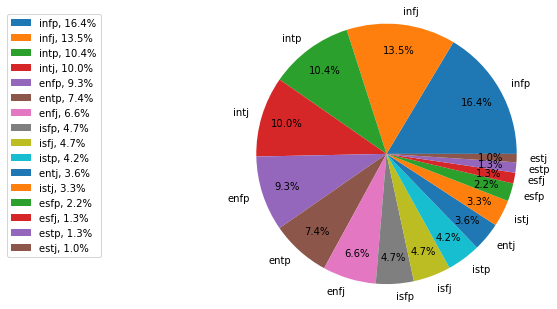

In [4]:
#Выберем значения
label_counts = data["label"].value_counts()
vals = label_counts.values
labels = label_counts.index

#Создадим круговую диаграмму
fig, ax = plt.subplots()
fig.subplots_adjust(0.3,0,1,1)
total = sum(vals)
ax.pie(vals, labels=labels, autopct='%1.1f%%', pctdistance=0.8, labeldistance= 1.1)
ax.legend(labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, vals)],
          bbox_to_anchor=(0.0, 1), 
          bbox_transform=fig.transFigure)
ax.axis("equal")

Как мы видим, больше всего представителей группы infp, что трактуется как интровертный, интуитивный, чувствительный и  склонный к суждениям тип, второе место занял infj, который отличается только последней характеристикой, которая трактуется как человек, предпочитающий плыть по течению, быть гибким и реагировать на события по мере их возникновения

Проанализируем теперь процентное отношении по каждому из измерений

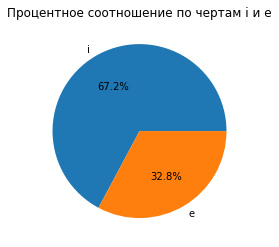

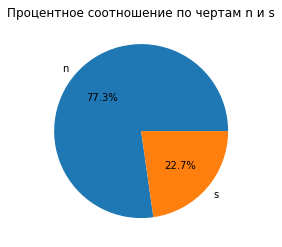

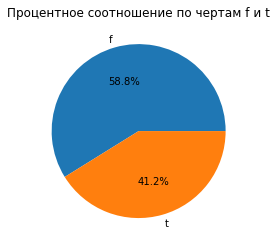

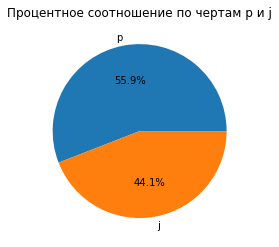

In [6]:
# Переменная для перехода  
group = 0
#Создадим два списка с 4-мя различными элементами для разбиения каждых типов
first= ['i', 'n', 'f', 'p']
second = ['e', 's', 't', 'j']

while group < 4:
    #Создадим две переменные для подсчета по подгруппам
    fitst_n = 0
    second_n = 0
    # Проанализируем каждую из 16 групп
    for ind, i in enumerate(labels):
        if i[group] in first:
            fitst_n += vals[ind]
        else:
            second_n += vals[ind]
    # Построим диаграмму
    plt.pie([fitst_n, second_n],
            labels=[first[group], second[group]],
            autopct='%1.1f%%',)
    plt.title(f"Процентное соотношение по чертам {first[group]} и {second[group]}")
    plt.show()
    group += 1

Анализируя полученные данные можно сделать вывод, что больше всего среди людей, попавших в выборку, интровертов и интуитов, а соотношение чувственный/мыслящий и восприимчивый/рассуждающий близко к равному

## Выводы 
Исходя из проведенного анализа данных, можно сделать следующие выводы:<br>
1. Наиболее распровтраненной среди пользователей Twitter, учакствующих в опросе, оказалась группа inpf, в четверку также вошли infj, intp, intj
2. Вышеперечисленные 4 группы составляют примерно половину от всех опрошенных
3. Меньше всего оказалось estj, estp, esfj - обладателями этих типов ококазались менее 1,5% людей по каждому типу
4. Больше 75% участников опроса в своей жизни чаще опираются на интуицию, а не на факты
5. Большенство людей из выборки являются интровертами
6. Наиболее близкая к равенсту по соотношению количества человек является группа восприятие/суждение (p/j)